<font size="+3" color=purple ><b> <center><u>Titanic:EDA+Stacked Ensembels Accuracy 0.80%</u></center></b></font>

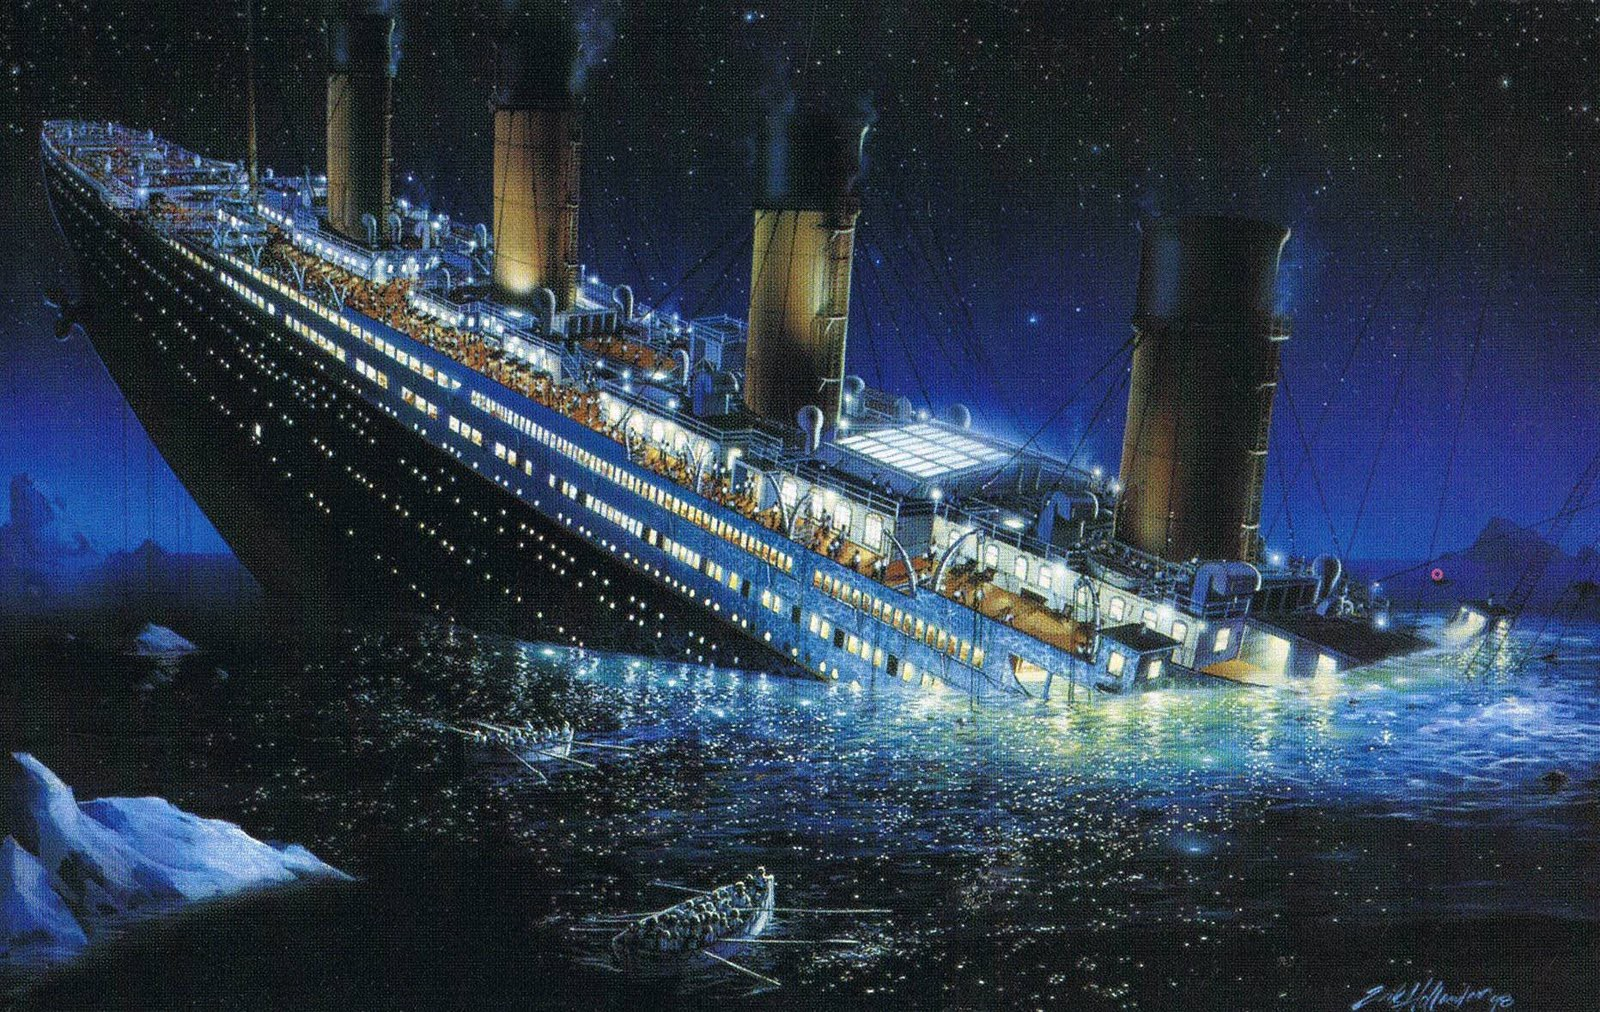

# Introduction
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this contest, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

This Kaggle Getting Started Competition provides an ideal starting place for people who may not have a lot of experience in data science and machine learning."

<font color = 'blue'>
Content: 

1. [Load and Check Data](#1)
1. [Variable Description](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable](#4)
        * [Numerical Variable](#5)
1. [Basic Data Analysis](#6)
1. [Outlier Detection](#7)
1. [Missing Value](#8)
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)
1. [Visualization](#11)
    * [Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived](#12)
    * [SibSp -- Survived](#13)
    * [Parch -- Survived](#14)
    * [Pclass -- Survived](#15)
    * [Age -- Survived](#16)
    * [Pclass -- Survived -- Age](#17)
    * [Embarked -- Sex -- Pclass -- Survived](#18)
    * [Embarked -- Sex -- Fare -- Survived](#19)
    * [Fill Missing: Age Feature](#20)
1. [Feature Engineering](#21)
    * [Name -- Title](#22)
    * [Family Size](#23)
    * [Embarked](#24)
    * [Ticket](#25)
    * [Pclass](#26)
    * [Sex](#27)
    * [Drop Passenger ID and Cabin](#28)
1. [Modeling](#29)
    * [Xgboost,Stacked Ensembels](#30)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import matplotlib.patches as patches
from aif360.algorithms.preprocessing import Reweighing
#from packages import *
#from ml_fairness import *
import matplotlib.pyplot as plt
import seaborn as sns



from IPython.display import Markdown, display

<a id = "1"></a><br>
# Load and Check Data 

In [3]:
train_df = pd.read_csv("../../Data/train.csv")
test_df = pd.read_csv("../../Data/train.csv")
test_PassengerId = test_df["PassengerId"]

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

<a id = "2"></a><br>
# Variable Description
1. PassengerId: unique id number to each passenger
1. Survived: passenger survive(1) or died(0)
1. Pclass: passenger class
1. Name: name
1. Sex: gender of passenger 
1. Age: age of passenger 
1. SibSp: number of siblings/spouses
1. Parch: number of parents/children 
1. Ticket: ticket number 
1. Fare: amount of money spent on ticket
1. Cabin: cabin category
1. Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2): Fare ve Age
* int64(5): Pclass, sibsp, parch, passengerId and survived
* object(5): Cabin, embarked, ticket, name and sex

<a id = "3"></a><br>
# Univariate Variable Analysis
* Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
* Numerical Variable: Fare, age and passengerId

<a id = "4"></a><br>
## Categorical Variable

In [8]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = train_df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

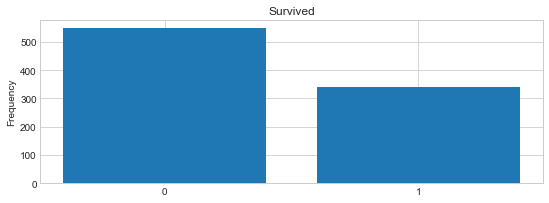

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


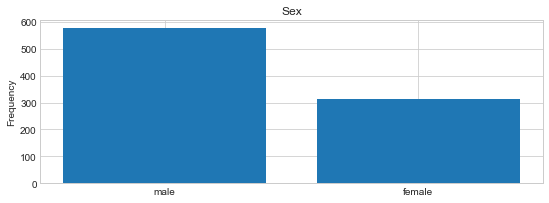

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


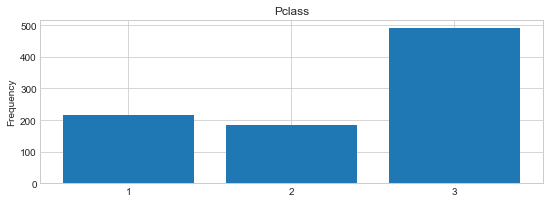

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


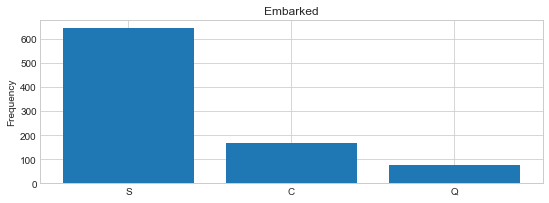

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


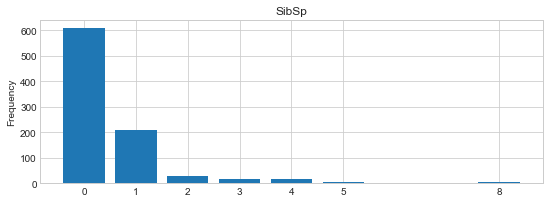

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


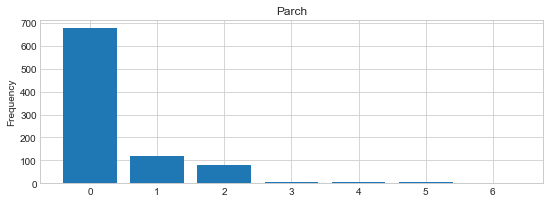

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [9]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
for c in category1:
    bar_plot(c)

In [10]:
category2 = ["Cabin", "Name", "Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
E101           3
              ..
B19            1
A26            1
A23            1
B73            1
A14            1
Name: Cabin, Length: 147, dtype: int64 

Reynaldo, Ms. Encarnacion                                        1
Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)          1
Lefebre, Miss. Jeannie                                           1
Risien, Mr. Samuel Beard                                         1
Brown, Mrs. Thomas William Solomon (Elizabeth Catherine Ford)    1
                                                                ..
Petroff, Mr. Nedelio                                             1
Baclini, Miss. Marie Catherine                                   1
Stanley, Miss. Amy Zillah Elsie                                  1
Moore, Mr. Leonard Charles                                       1
Pavlovic, Mr. Stefo                                              1
Name: Name, Length: 891, dtype: int

<a id = "5"></a><br>
## Numerical Variable

In [11]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

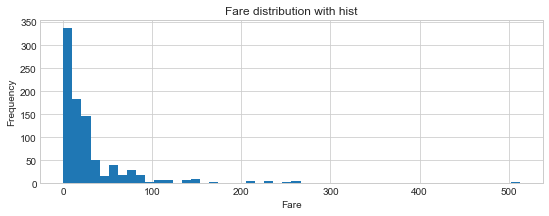

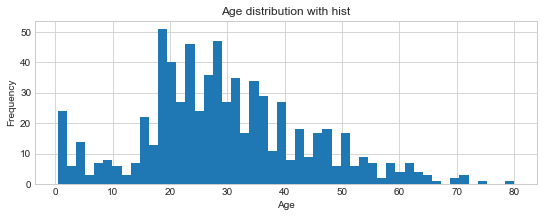

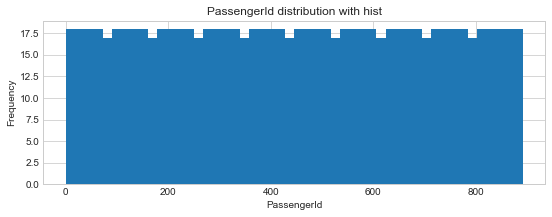

In [12]:
numericVar = ["Fare", "Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

<a id = "6"></a><br>
# Basic Data Analysis
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

In [13]:
# Plcass vs Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

In [14]:
# Sex vs Survived
train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

Sex  Survived
0  female  0.742038
1    male  0.188908

In [15]:
# Sibsp vs Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

In [16]:
# Parch vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

<a id = "7"></a><br>
# Outlier Detection

In [17]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [18]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

PassengerId  Survived  Pclass                               Name     Sex  \
27            28         0       1     Fortune, Mr. Charles Alexander    male   
88            89         1       1         Fortune, Miss. Mabel Helen  female   
159          160         0       3         Sage, Master. Thomas Henry    male   
180          181         0       3       Sage, Miss. Constance Gladys  female   
201          202         0       3                Sage, Mr. Frederick    male   
324          325         0       3           Sage, Mr. George John Jr    male   
341          342         1       1     Fortune, Miss. Alice Elizabeth  female   
792          793         0       3            Sage, Miss. Stella Anna  female   
846          847         0       3           Sage, Mr. Douglas Bullen    male   
863          864         0       3  Sage, Miss. Dorothy Edith "Dolly"  female   

      Age  SibSp  Parch    Ticket    Fare        Cabin Embarked  
27   19.0      3      2     19950  263.00  C23 C25 C27        S  
88   23.0      3      2     19950  263.00  C23 C25 C27        S  
159   NaN      8      2  CA. 2343   69.55          NaN        S  
180   NaN      8      2  CA. 2343   69.55          NaN        S  
201   NaN      8      2  CA. 2343   69.55          NaN        S  
324   NaN      8      2  CA. 2343   69.55          NaN        S  
341  24.0      3      2     19950  263.00  C23 C25 C27        S  
792   NaN      8      2  CA. 2343   69.55          NaN        S  
846   NaN      8      2  CA. 2343   69.55          NaN        S  
863   NaN      8      2  CA. 2343   69.55          NaN        S

In [19]:
# drop outliers
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

<a id = "8"></a><br>
# Missing Value
* Find Missing Value
* Fill Missing Value

In [20]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)

In [21]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<a id = "9"></a><br>
## Find Missing Value

In [22]:
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [23]:
train_df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             347
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1367
Embarked          4
dtype: int64

<a id = "10"></a><br>
## Fill Missing Value
* Embarked has 2 missing value
* Fare has only 1

In [24]:
train_df[train_df["Embarked"].isnull()]

PassengerId  Survived  Pclass  \
60             62         1       1   
821           830         1       1   
942            62         1       1   
1710          830         1       1   

                                           Name     Sex   Age  SibSp  Parch  \
60                          Icard, Miss. Amelie  female  38.0      0      0   
821   Stone, Mrs. George Nelson (Martha Evelyn)  female  62.0      0      0   
942                         Icard, Miss. Amelie  female  38.0      0      0   
1710  Stone, Mrs. George Nelson (Martha Evelyn)  female  62.0      0      0   

      Ticket  Fare Cabin Embarked  
60    113572  80.0   B28      NaN  
821   113572  80.0   B28      NaN  
942   113572  80.0   B28      NaN  
1710  113572  80.0   B28      NaN

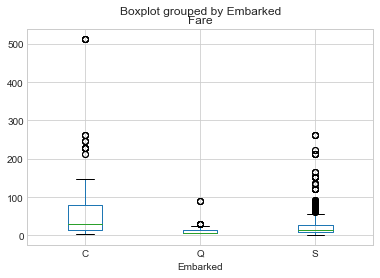

In [25]:
train_df.boxplot(column="Fare",by = "Embarked")
plt.show()

In [26]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

In [27]:
train_df[train_df["Fare"].isnull()]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

In [28]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))

In [29]:
train_df[train_df["Fare"].isnull()]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

<a id = "11"></a><br>
# Visualization

<a id = "12"></a><br>
## Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived

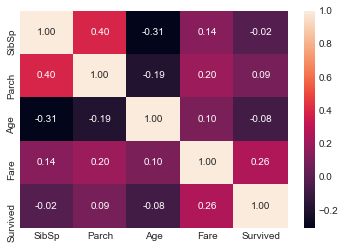

In [30]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

Fare feature seems to have correlation with survived feature (0.26).

<a id = "13"></a><br>
## SibSp -- Survived

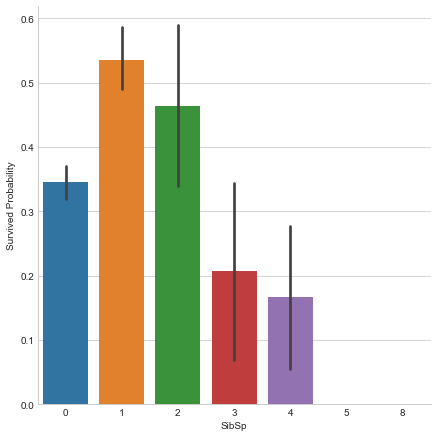

In [31]:
g = sns.factorplot(x = "SibSp", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

* Having a lot of SibSp have less chance to survive.
* if sibsp == 0 or 1 or 2, passenger has more chance to survive
* we can consider a new feature describing these categories.

<a id = "14"></a><br>
## Parch -- Survived

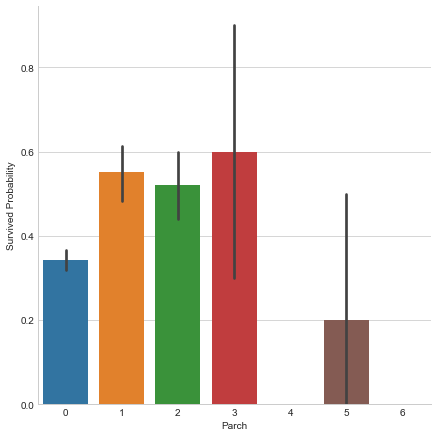

In [32]:
g = sns.factorplot(x = "Parch", y = "Survived", kind = "bar", data = train_df, size = 6)
g.set_ylabels("Survived Probability")
plt.show()

* Sibsp and parch can be used for new feature extraction with th = 3
* small familes have more chance to survive.
* there is a std in survival of passenger with parch = 3

<a id = "15"></a><br>
## Pclass -- Survived

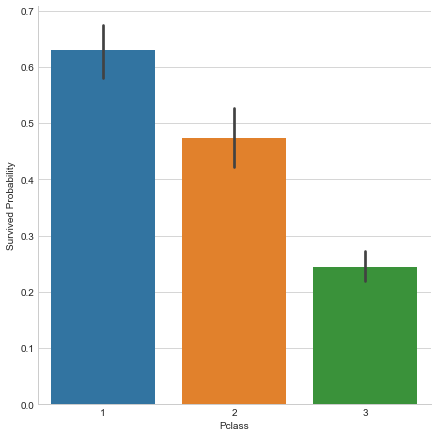

In [33]:
g = sns.factorplot(x = "Pclass", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

<a id = "16"></a><br>
## Age -- Survived

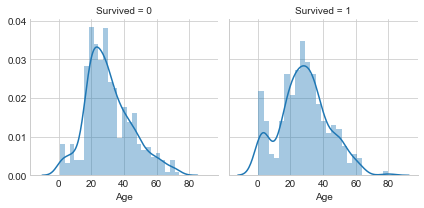

In [34]:
g = sns.FacetGrid(train_df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

* age <= 10 has a high survival rate,
* oldest passengers (80) survived,
* large number of 20 years old did not survive,
* most passengers are in 15-35 age range,
* use age feature in training
* use age distribution for missing value of age

<a id = "17"></a><br>
## Pclass -- Survived -- Age

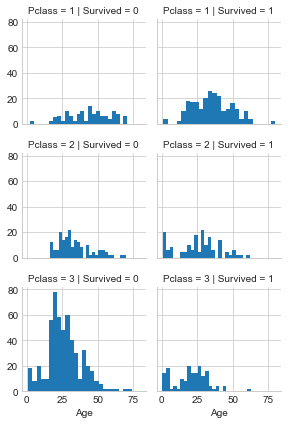

In [35]:
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass", size = 2)
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

* pclass is important feature for model training.

<a id = "18"></a><br>
## Embarked -- Sex -- Pclass -- Survived

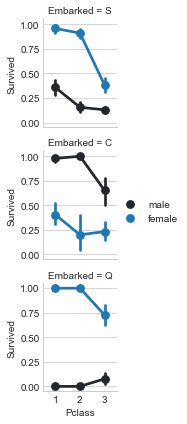

In [36]:
g = sns.FacetGrid(train_df, row = "Embarked", size = 2)
g.map(sns.pointplot, "Pclass","Survived","Sex")
g.add_legend()
plt.show()

* Female passengers have much better survival rate than males.
* males have better survşval rate in pclass 3 in C.
* embarked and sex will be used in training.

<a id = "19"></a><br>
## Embarked -- Sex -- Fare -- Survived

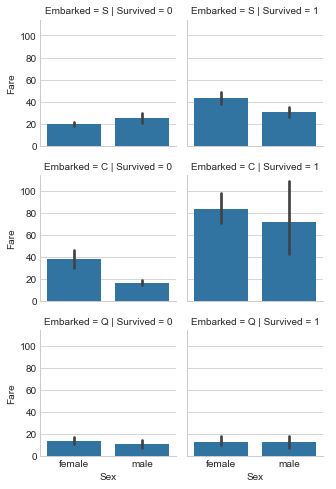

In [37]:
g = sns.FacetGrid(train_df, row = "Embarked", col = "Survived", size = 2.3)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

* Passsengers who pay higher fare have better survival. Fare can be used as categorical for training.

<a id = "20"></a><br>
## Fill Missing: Age Feature

In [38]:
train_df[train_df["Age"].isnull()]

PassengerId  Survived  Pclass                                      Name  \
5               6         0       3                          Moran, Mr. James   
17             18         1       2              Williams, Mr. Charles Eugene   
19             20         1       3                   Masselmani, Mrs. Fatima   
26             27         0       3                   Emir, Mr. Farred Chehab   
27             29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
...           ...       ...     ...                                       ...   
1740          860         0       3                          Razi, Mr. Raihed   
1744          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
1749          869         0       3               van Melkebeke, Mr. Philemon   
1759          879         0       3                        Laleff, Mr. Kristo   
1769          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

         Sex  Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
5       male  NaN      0      0      330877   8.4583   NaN        Q  
17      male  NaN      0      0      244373  13.0000   NaN        S  
19    female  NaN      0      0        2649   7.2250   NaN        C  
26      male  NaN      0      0        2631   7.2250   NaN        C  
27    female  NaN      0      0      330959   7.8792   NaN        Q  
...      ...  ...    ...    ...         ...      ...   ...      ...  
1740    male  NaN      0      0        2629   7.2292   NaN        C  
1744  female  NaN      8      2    CA. 2343  69.5500   NaN        S  
1749    male  NaN      0      0      345777   9.5000   NaN        S  
1759    male  NaN      0      0      349217   7.8958   NaN        S  
1769  female  NaN      1      2  W./C. 6607  23.4500   NaN        S  

[347 rows x 12 columns]

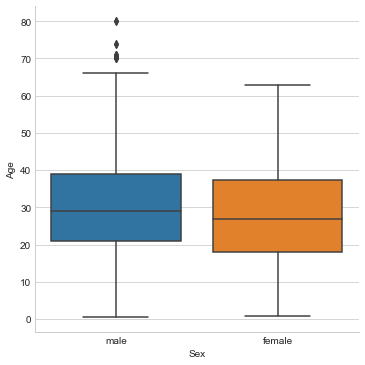

In [39]:
sns.factorplot(x = "Sex", y = "Age", data = train_df, kind = "box")
plt.show()

Sex is not informative for age prediction, age distribution seems to be same.

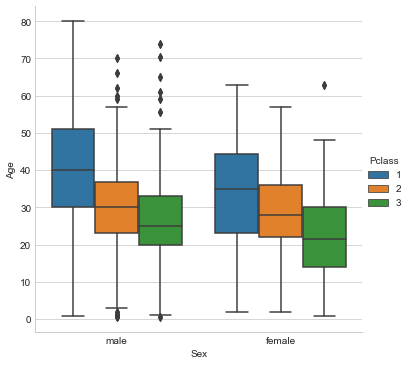

In [40]:
sns.factorplot(x = "Sex", y = "Age", hue = "Pclass",data = train_df, kind = "box")
plt.show()

1st class passengers are older than 2nd, and 2nd is older than 3rd class. 

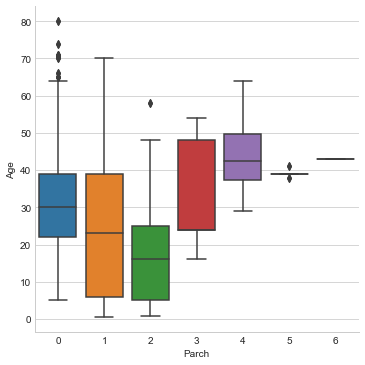

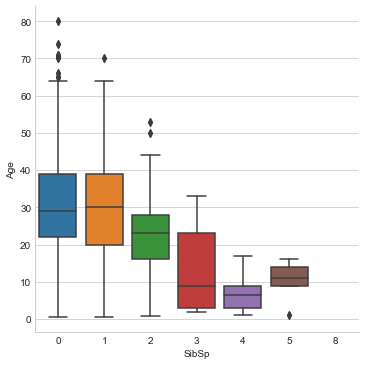

In [41]:
sns.factorplot(x = "Parch", y = "Age", data = train_df, kind = "box")
sns.factorplot(x = "SibSp", y = "Age", data = train_df, kind = "box")
plt.show()

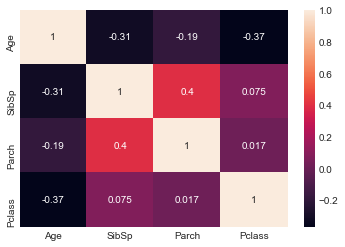

In [42]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

Age is not correlated with sex but it is correlated with parch, sibsp and pclass.

In [43]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [44]:
train_df[train_df["Age"].isnull()]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

<a id = "21"></a><br>
# Feature Engineering

<a id = "22"></a><br>
## Name -- Title

In [45]:
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [46]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [47]:
 train_df["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

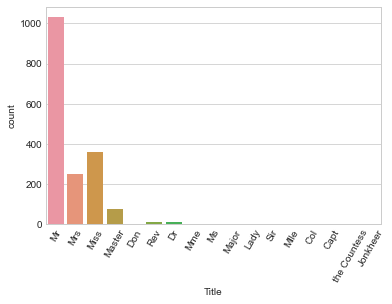

In [48]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [49]:
# convert to categorical
train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

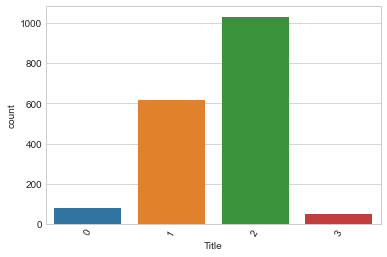

In [50]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

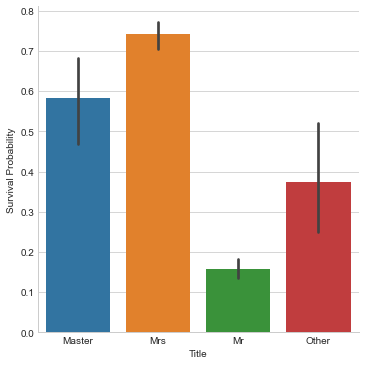

In [51]:
g = sns.factorplot(x = "Title", y = "Survived", data = train_df, kind = "bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [52]:
train_df.drop(labels = ["Name"], axis = 1, inplace = True)

In [53]:
train_df.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  Title  
0         A/5 21171   7.2500   NaN        S      2  
1          PC 17599  71.2833   C85        C      1  
2  STON/O2. 3101282   7.9250   NaN        S      1  
3            113803  53.1000  C123        S      1  
4            373450   8.0500   NaN        S      2

In [54]:
train_df = pd.get_dummies(train_df,columns=["Title"])
train_df.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  Title_0  Title_1  Title_2  \
0         A/5 21171   7.2500   NaN        S        0        0        1   
1          PC 17599  71.2833   C85        C        0        1        0   
2  STON/O2. 3101282   7.9250   NaN        S        0        1        0   
3            113803  53.1000  C123        S        0        1        0   
4            373450   8.0500   NaN        S        0        0        1   

   Title_3  
0        0  
1        0  
2        0  
3        0  
4        0

<a id = "23"></a><br>
## Family Size

In [55]:
train_df.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  Title_0  Title_1  Title_2  \
0         A/5 21171   7.2500   NaN        S        0        0        1   
1          PC 17599  71.2833   C85        C        0        1        0   
2  STON/O2. 3101282   7.9250   NaN        S        0        1        0   
3            113803  53.1000  C123        S        0        1        0   
4            373450   8.0500   NaN        S        0        0        1   

   Title_3  
0        0  
1        0  
2        0  
3        0  
4        0

In [56]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

In [57]:
train_df.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  Title_0  Title_1  Title_2  \
0         A/5 21171   7.2500   NaN        S        0        0        1   
1          PC 17599  71.2833   C85        C        0        1        0   
2  STON/O2. 3101282   7.9250   NaN        S        0        1        0   
3            113803  53.1000  C123        S        0        1        0   
4            373450   8.0500   NaN        S        0        0        1   

   Title_3  Fsize  
0        0      2  
1        0      2  
2        0      1  
3        0      2  
4        0      1

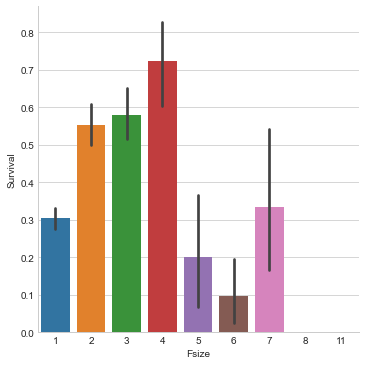

In [58]:
g = sns.factorplot(x = "Fsize", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [59]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]

In [60]:
train_df.head(10)

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   
5            6         0       3    male  26.0      0      0   
6            7         0       1    male  54.0      0      0   
7            8         0       3    male   2.0      3      1   
8            9         1       3  female  27.0      0      2   
9           10         1       2  female  14.0      1      0   

             Ticket     Fare Cabin Embarked  Title_0  Title_1  Title_2  \
0         A/5 21171   7.2500   NaN        S        0        0        1   
1          PC 17599  71.2833   C85        C        0        1        0   
2  STON/O2. 3101282   7.9250   NaN        S        0        1        0   
3            113803  53.1000  C123        S        0        1        0   
4            373450   8.0500   NaN        S        0        0        1   
5            330877   8.4583   NaN        Q        0        0        1   
6             17463  51.8625   E46        S        0        0        1   
7            349909  21.0750   NaN        S        1        0        0   
8            347742  11.1333   NaN        S        0        1        0   
9            237736  30.0708   NaN        C        0        1        0   

   Title_3  Fsize  family_size  
0        0      2            1  
1        0      2            1  
2        0      1            1  
3        0      2            1  
4        0      1            1  
5        0      1            1  
6        0      1            1  
7        0      5            0  
8        0      3            1  
9        0      2            1

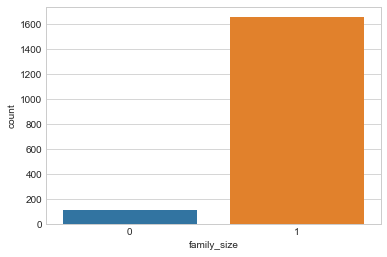

In [61]:
sns.countplot(x = "family_size", data = train_df)
plt.show()

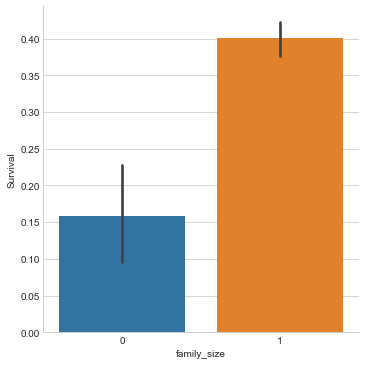

In [62]:
g = sns.factorplot(x = "family_size", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

Small familes have more chance to survive than large families.

In [63]:
train_df = pd.get_dummies(train_df, columns= ["family_size"])
train_df.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  Title_0  Title_1  Title_2  \
0         A/5 21171   7.2500   NaN        S        0        0        1   
1          PC 17599  71.2833   C85        C        0        1        0   
2  STON/O2. 3101282   7.9250   NaN        S        0        1        0   
3            113803  53.1000  C123        S        0        1        0   
4            373450   8.0500   NaN        S        0        0        1   

   Title_3  Fsize  family_size_0  family_size_1  
0        0      2              0              1  
1        0      2              0              1  
2        0      1              0              1  
3        0      2              0              1  
4        0      1              0              1

<a id = "24"></a><br>
## Embarked

In [64]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

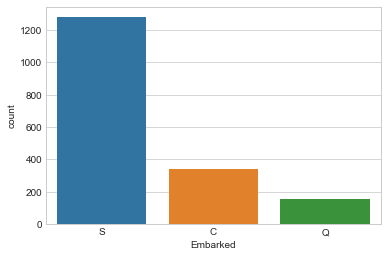

In [65]:
sns.countplot(x = "Embarked", data = train_df)
plt.show()

In [66]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin  Title_0  Title_1  Title_2  Title_3  Fsize  \
0         A/5 21171   7.2500   NaN        0        0        1        0      2   
1          PC 17599  71.2833   C85        0        1        0        0      2   
2  STON/O2. 3101282   7.9250   NaN        0        1        0        0      1   
3            113803  53.1000  C123        0        1        0        0      2   
4            373450   8.0500   NaN        0        0        1        0      1   

   family_size_0  family_size_1  Embarked_C  Embarked_Q  Embarked_S  
0              0              1           0           0           1  
1              0              1           1           0           0  
2              0              1           0           0           1  
3              0              1           0           0           1  
4              0              1           0           0           1

<a id = "25"></a><br>
## Ticket

In [67]:
train_df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [68]:
a = "A/5. 2151"
a.replace(".","").replace("/","").strip().split(" ")[0]

'A5'

In [69]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [70]:
train_df["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

In [71]:
train_df.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  Ticket     Fare  \
0            1         0       3    male  22.0      1      0      A5   7.2500   
1            2         1       1  female  38.0      1      0      PC  71.2833   
2            3         1       3  female  26.0      0      0  STONO2   7.9250   
3            4         1       1  female  35.0      1      0       x  53.1000   
4            5         0       3    male  35.0      0      0       x   8.0500   

  Cabin  Title_0  Title_1  Title_2  Title_3  Fsize  family_size_0  \
0   NaN        0        0        1        0      2              0   
1   C85        0        1        0        0      2              0   
2   NaN        0        1        0        0      1              0   
3  C123        0        1        0        0      2              0   
4   NaN        0        0        1        0      1              0   

   family_size_1  Embarked_C  Embarked_Q  Embarked_S  
0              1           0           0           1  
1              1           1           0           0  
2              1           0           0           1  
3              1           0           0           1  
4              1           0           0           1

In [72]:
train_df = pd.get_dummies(train_df, columns= ["Ticket"], prefix = "T")
train_df.head(10)

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
0            1         0       3    male  22.0      1      0   7.2500   NaN   
1            2         1       1  female  38.0      1      0  71.2833   C85   
2            3         1       3  female  26.0      0      0   7.9250   NaN   
3            4         1       1  female  35.0      1      0  53.1000  C123   
4            5         0       3    male  35.0      0      0   8.0500   NaN   
5            6         0       3    male  26.0      0      0   8.4583   NaN   
6            7         0       1    male  54.0      0      0  51.8625   E46   
7            8         0       3    male   2.0      3      1  21.0750   NaN   
8            9         1       3  female  27.0      0      2  11.1333   NaN   
9           10         1       2  female  14.0      1      0  30.0708   NaN   

   Title_0  ...  T_SOPP  T_SOTONO2  T_SOTONOQ  T_SP  T_STONO  T_STONO2  \
0        0  ...       0          0          0     0        0         0   
1        0  ...       0          0          0     0        0         0   
2        0  ...       0          0          0     0        0         1   
3        0  ...       0          0          0     0        0         0   
4        0  ...       0          0          0     0        0         0   
5        0  ...       0          0          0     0        0         0   
6        0  ...       0          0          0     0        0         0   
7        1  ...       0          0          0     0        0         0   
8        0  ...       0          0          0     0        0         0   
9        0  ...       0          0          0     0        0         0   

   T_SWPP  T_WC  T_WEP  T_x  
0       0     0      0    0  
1       0     0      0    0  
2       0     0      0    0  
3       0     0      0    1  
4       0     0      0    1  
5       0     0      0    1  
6       0     0      0    1  
7       0     0      0    1  
8       0     0      0    1  
9       0     0      0    1  

[10 rows x 50 columns]

<a id = "26"></a><br>
## Pclass

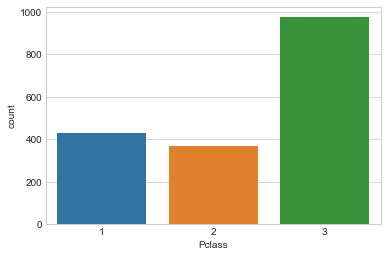

In [73]:
sns.countplot(x = "Pclass", data = train_df)
plt.show()

In [74]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns= ["Pclass"])
train_df.head()

PassengerId  Survived     Sex   Age  SibSp  Parch     Fare Cabin  Title_0  \
0            1         0    male  22.0      1      0   7.2500   NaN        0   
1            2         1  female  38.0      1      0  71.2833   C85        0   
2            3         1  female  26.0      0      0   7.9250   NaN        0   
3            4         1  female  35.0      1      0  53.1000  C123        0   
4            5         0    male  35.0      0      0   8.0500   NaN        0   

   Title_1  ...  T_SP  T_STONO  T_STONO2  T_SWPP  T_WC  T_WEP  T_x  Pclass_1  \
0        0  ...     0        0         0       0     0      0    0         0   
1        1  ...     0        0         0       0     0      0    0         1   
2        1  ...     0        0         1       0     0      0    0         0   
3        1  ...     0        0         0       0     0      0    1         1   
4        0  ...     0        0         0       0     0      0    1         0   

   Pclass_2  Pclass_3  
0         0         1  
1         0         0  
2         0         1  
3         0         0  
4         0         1  

[5 rows x 52 columns]

<a id = "27"></a><br>
## Sex

In [75]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

PassengerId  Survived   Age  SibSp  Parch     Fare Cabin  Title_0  Title_1  \
0            1         0  22.0      1      0   7.2500   NaN        0        0   
1            2         1  38.0      1      0  71.2833   C85        0        1   
2            3         1  26.0      0      0   7.9250   NaN        0        1   
3            4         1  35.0      1      0  53.1000  C123        0        1   
4            5         0  35.0      0      0   8.0500   NaN        0        0   

   Title_2  ...  T_STONO2  T_SWPP  T_WC  T_WEP  T_x  Pclass_1  Pclass_2  \
0        1  ...         0       0     0      0    0         0         0   
1        0  ...         0       0     0      0    0         1         0   
2        0  ...         1       0     0      0    0         0         0   
3        0  ...         0       0     0      0    1         1         0   
4        1  ...         0       0     0      0    1         0         0   

   Pclass_3  Sex_female  Sex_male  
0         1           0         1  
1         0           1         0  
2         1           1         0  
3         0           1         0  
4         1           0         1  

[5 rows x 53 columns]

<a id = "28"></a><br>
## Drop Passenger ID and Cabin 

In [76]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

In [77]:
train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Fsize', 'family_size_0', 'family_size_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A4', 'T_A5', 'T_AS', 'T_C',
       'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa', 'T_LINE', 'T_PC', 'T_PP',
       'T_PPP', 'T_SC', 'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis',
       'T_SOC', 'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

In [78]:
train_df.head(10)

Survived   Age  SibSp  Parch     Fare  Title_0  Title_1  Title_2  Title_3  \
0         0  22.0      1      0   7.2500        0        0        1        0   
1         1  38.0      1      0  71.2833        0        1        0        0   
2         1  26.0      0      0   7.9250        0        1        0        0   
3         1  35.0      1      0  53.1000        0        1        0        0   
4         0  35.0      0      0   8.0500        0        0        1        0   
5         0  26.0      0      0   8.4583        0        0        1        0   
6         0  54.0      0      0  51.8625        0        0        1        0   
7         0   2.0      3      1  21.0750        1        0        0        0   
8         1  27.0      0      2  11.1333        0        1        0        0   
9         1  14.0      1      0  30.0708        0        1        0        0   

   Fsize  ...  T_STONO2  T_SWPP  T_WC  T_WEP  T_x  Pclass_1  Pclass_2  \
0      2  ...         0       0     0      0    0         0         0   
1      2  ...         0       0     0      0    0         1         0   
2      1  ...         1       0     0      0    0         0         0   
3      2  ...         0       0     0      0    1         1         0   
4      1  ...         0       0     0      0    1         0         0   
5      1  ...         0       0     0      0    1         0         0   
6      1  ...         0       0     0      0    1         1         0   
7      5  ...         0       0     0      0    1         0         0   
8      3  ...         0       0     0      0    1         0         0   
9      2  ...         0       0     0      0    1         0         1   

   Pclass_3  Sex_female  Sex_male  
0         1           0         1  
1         0           1         0  
2         1           1         0  
3         0           1         0  
4         1           0         1  
5         1           0         1  
6         0           0         1  
7         1           0         1  
8         1           1         0  
9         0           1         0  

[10 rows x 51 columns]

<a id = "29"></a><br>
# Modeling

In [79]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

<a id = "30"></a><br>
## XgBoost Fine Tuning

**We are now using a XgBoost Classifier with Tuning using GridSearch CV**

In [87]:
train_df_len

881

In [84]:
test = train_df[train_df_len:]
test.drop(labels = ["Survived"],axis = 1, inplace = True)


In [85]:
test.head()

Age  SibSp  Parch     Fare  Title_0  Title_1  Title_2  Title_3  Fsize  \
881  22.0      1      0   7.2500        0        0        1        0      2   
882  38.0      1      0  71.2833        0        1        0        0      2   
883  26.0      0      0   7.9250        0        1        0        0      1   
884  35.0      1      0  53.1000        0        1        0        0      2   
885  35.0      0      0   8.0500        0        0        1        0      1   

     family_size_0  ...  T_STONO2  T_SWPP  T_WC  T_WEP  T_x  Pclass_1  \
881              0  ...         0       0     0      0    0         0   
882              0  ...         0       0     0      0    0         1   
883              0  ...         1       0     0      0    0         0   
884              0  ...         0       0     0      0    1         1   
885              0  ...         0       0     0      0    1         0   

     Pclass_2  Pclass_3  Sex_female  Sex_male  
881         0         1           0         1  
882         0         0           1         0  
883         0         1           1         0  
884         0         0           1         0  
885         0         1           0         1  

[5 rows x 50 columns]

In [86]:
train = train_df[:train_df_len]
X_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]

In [85]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb_model = XGBClassifier(
        objective = 'binary:logistic',
        colsample_bytree = 0.8,
        learning_rate = 0.3,
        max_depth = 7,
        min_child_weight = 3,
        n_estimators = 100,
        subsample = 0.6)

# {'colsample_bytree': 0.5,
#  'learning_rate': 0.1,
#  'max_depth': 7,
#  'min_child_weight': 3,
#  'n_estimators': 100,
#  'objective': 'binary:logistic',
#  'subsample': 0.7}

%time xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_train, y_train)], verbose=False)
y_pred_xgb = xgb_model.predict(X_train)
a_xgb = accuracy_score(y_train, y_pred_xgb)

print("AS: ", a_xgb)

[06:34:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 497 ms, sys: 8.65 ms, total: 506 ms
Wall time: 265 ms
AS:  0.923950056753689


### K-Folds Cross Validation

In [86]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=xgb_model,X=X_train,y=y_train,cv=5)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))

[06:34:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:34:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:34:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:34:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

## Fine Tuning the Xgb Model

In [ ]:
#XGBoost hyper-parameter tuning
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
def hyperParameterTuning(x_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['binary:logistic']
    }

    xgb_model = XGBClassifier()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [ ]:
hyperParameterTuning(X_train, y_train)

## Stacked Ensembles 

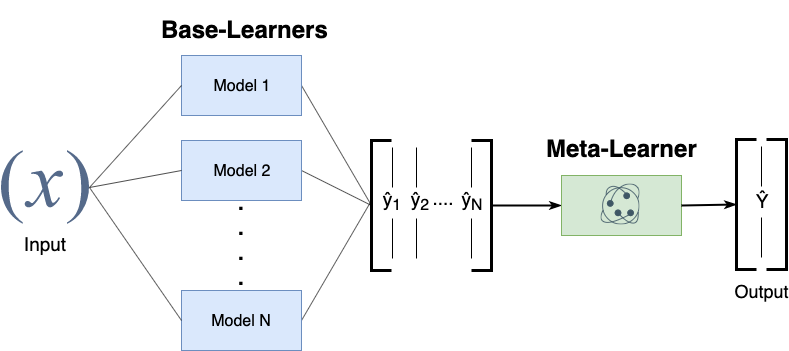

In [87]:
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
layer_one_estimators = [
                        ('rf_1', RandomForestClassifier(n_estimators=40, random_state=42)),
                        ('knn_1', KNeighborsClassifier(n_neighbors=6))             
                       ]
layer_two_estimators = [
                        ('rf_2', RandomForestClassifier(n_estimators=40, random_state=42)),
                        #('rf_2', RandomForestRegressor(n_estimators=20, random_state=42)),
                        ('xg_2', XGBClassifier(
        objective = 'binary:logistic',
        colsample_bytree = 0.8,
        learning_rate = 0.3,
        max_depth = 7,
        min_child_weight = 3,
        n_estimators = 100,
        subsample = 0.6)
)

                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=RandomForestClassifier())

# Create Final model by 
clf2 = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

In [88]:
clf2.fit(X_train,y_train)
y_pred_xgb = clf2.predict(X_train)
ac_xgb = accuracy_score(y_train, y_pred_xgb)

print("MAE: ", ac_xgb)

[06:36:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:36:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:36:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:36:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

### Generate titanic.csv

In [89]:
test_survived = pd.Series(xgb_model.predict(test), name = "Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived],axis = 1)
results.to_csv("titanic.csv", index = False)

## Congrats you have made your first Submission 🎉🎊

### Reference's

1. EDA - https://www.kaggle.com/kanncaa1/dataiteam-titanic-eda

<font size="+3" color=orange ><b> <center><u>Upvote If you like it!!👍😁</u></center></b></font>

## Fairness

In [4]:
# This DataFrame is created to stock differents models and fair metrics that we produce in this notebook
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

def add_to_df_algo_metrics(algo_metrics, model, fair_metrics, preds, probs, name):
    return algo_metrics.append(pd.DataFrame(data=[[model, fair_metrics, preds, probs]], columns=['model', 'fair_metrics', 'prediction', 'probs'], index=[name]))

In [5]:
def fair_metrics(dataset, pred, pred_is_dataset=False):
    if pred_is_dataset:
        dataset_pred = pred
    else:
        dataset_pred = dataset.copy()
        dataset_pred.labels = pred
    
    cols = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference',  'disparate_impact', 'theil_index']
    obj_fairness = [[0,0,0,1,0]]
    
    fair_metrics = pd.DataFrame(data=obj_fairness, index=['objective'], columns=cols)
    
    for attr in dataset_pred.protected_attribute_names:
        idx = dataset_pred.protected_attribute_names.index(attr)
        privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}] 
        unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}] 
        
        classified_metric = ClassificationMetric(dataset, 
                                                     dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        acc = classified_metric.accuracy()

        row = pd.DataFrame([[metric_pred.mean_difference(),
                                classified_metric.equal_opportunity_difference(),
                                classified_metric.average_abs_odds_difference(),
                                metric_pred.disparate_impact(),
                                classified_metric.theil_index()]],
                           columns  = cols,
                           index = [attr]
                          )
        fair_metrics = fair_metrics.append(row)    
    
    fair_metrics = fair_metrics.replace([-np.inf, np.inf], 2)
        
    return fair_metrics

def plot_fair_metrics(fair_metrics):
    fig, ax = plt.subplots(figsize=(20,4), ncols=5, nrows=1)

    plt.subplots_adjust(
        left    =  0.125, 
        bottom  =  0.1, 
        right   =  0.9, 
        top     =  0.9, 
        wspace  =  .5, 
        hspace  =  1.1
    )

    y_title_margin = 1.2

    plt.suptitle("Fairness metrics", y = 1.09, fontsize=20)
    sns.set(style="dark")

    cols = fair_metrics.columns.values
    obj = fair_metrics.loc['objective']
    size_rect = [0.2,0.2,0.2,0.4,0.25]
    rect = [-0.1,-0.1,-0.1,0.8,0]
    bottom = [-1,-1,-1,0,0]
    top = [1,1,1,2,1]
    bound = [[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0.8,1.2],[0,0.25]]

    display(Markdown("### Check bias metrics :"))
    display(Markdown("A model can be considered bias if just one of these five metrics show that this model is biased."))
    for attr in fair_metrics.index[1:len(fair_metrics)].values:
        display(Markdown("#### For the %s attribute :"%attr))
        check = [bound[i][0] < fair_metrics.loc[attr][i] < bound[i][1] for i in range(0,5)]
        display(Markdown("With default thresholds, bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        ax = sns.barplot(x=fair_metrics.index[1:len(fair_metrics)], y=fair_metrics.iloc[1:len(fair_metrics)][cols[i]])
        
        for j in range(0,len(fair_metrics)-1):
            a, val = ax.patches[j], fair_metrics.iloc[j+1][cols[i]]
            marg = -0.2 if val < 0 else 0.1
            ax.text(a.get_x()+a.get_width()/5, a.get_y()+a.get_height()+marg, round(val, 3), fontsize=15,color='black')

        plt.ylim(bottom[i], top[i])
        plt.setp(ax.patches, linewidth=0)
        ax.add_patch(patches.Rectangle((-5,rect[i]), 10, size_rect[i], alpha=0.3, facecolor="green", linewidth=1, linestyle='solid'))
        plt.axhline(obj[i], color='black', alpha=0.3)
        plt.title(cols[i])
        ax.set_ylabel('')    
        ax.set_xlabel('')

In [6]:
def get_fair_metrics_and_plot(data, model, plot=False, model_aif=False):
    pred = model.predict(data).labels if model_aif else model.predict(data.features)
    # fair_metrics function available in the metrics.py file
    fair = fair_metrics(data, pred)

    if plot:
        # plot_fair_metrics function available in the visualisations.py file
        # The visualisation of this function is inspired by the dashboard on the demo of IBM aif360 
        plot_fair_metrics(fair)
        display(fair)
    
    return fair

In [329]:
train

Survived   Age  SibSp  Parch     Fare  Title_0  Title_1  Title_2  \
0           0  22.0      1      0   7.2500        0        0        1   
1           1  38.0      1      0  71.2833        0        1        0   
2           1  26.0      0      0   7.9250        0        1        0   
3           1  35.0      1      0  53.1000        0        1        0   
4           0  35.0      0      0   8.0500        0        0        1   
..        ...   ...    ...    ...      ...      ...      ...      ...   
876         0  27.0      0      0  13.0000        0        0        0   
877         1  19.0      0      0  30.0000        0        1        0   
878         0  13.5      1      2  23.4500        0        1        0   
879         1  26.0      0      0  30.0000        0        0        1   
880         0  32.0      0      0   7.7500        0        0        1   

     Title_3  Fsize  ...  T_STONO2  T_SWPP  T_WC  T_WEP  T_x  Pclass_1  \
0          0      2  ...         0       0     0      0    0         0   
1          0      2  ...         0       0     0      0    0         1   
2          0      1  ...         1       0     0      0    0         0   
3          0      2  ...         0       0     0      0    1         1   
4          0      1  ...         0       0     0      0    1         0   
..       ...    ...  ...       ...     ...   ...    ...  ...       ...   
876        1      1  ...         0       0     0      0    1         0   
877        0      1  ...         0       0     0      0    1         1   
878        0      4  ...         0       0     1      0    0         0   
879        0      1  ...         0       0     0      0    1         1   
880        0      1  ...         0       0     0      0    1         0   

     Pclass_2  Pclass_3  Sex_female  Sex_male  
0           0         1           0         1  
1           0         0           1         0  
2           0         1           1         0  
3           0         0           1         0  
4           0         1           0         1  
..        ...       ...         ...       ...  
876         1         0           0         1  
877         0         0           1         0  
878         0         1           1         0  
879         0         0           0         1  
880         0         1           0         1  

[881 rows x 51 columns]

In [91]:
#print(X)


#combine_final = [train_df, test_df]
#result = pd.concat(combine_final)
#print(result.ifany())
#print(result)
privileged_groups = [{'Sex_female': 1}]
unprivileged_groups = [{'Sex_female': 0}]
dataset_orig = StandardDataset(train,
                                  label_name='Survived',
                                  protected_attribute_names=['Sex_female'],
                                  favorable_classes=[1],
                                  privileged_classes=[[1]])


In [92]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.557013


In [147]:
aa = data_orig_train
bb = data_orig_test

In [7]:
data_orig_train = pd.read_pickle('../../Results/Stacking/3-introduction-to-ensembling-techniques_Train.pkl')
data_orig_test = pd.read_pickle('../../Results/Stacking/3-introduction-to-ensembling-techniques_Test.pkl')

In [11]:
import ipynbname
nb_fname = ipynbname.name()
nb_path = ipynbname.path()

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
import pickle

#data_orig_train, data_orig_test = dataset_orig.split([0.7], shuffle=True)
X_train = data_orig_train.features
y_train = data_orig_train.labels.ravel()

X_test = data_orig_test.features
y_test = data_orig_test.labels.ravel()

layer_one_estimators = [('rf_1', RandomForestClassifier(n_estimators=40, random_state=42)),('knn_1', KNeighborsClassifier(n_neighbors=6))]
layer_two_estimators = [('rf_2', RandomForestClassifier(n_estimators=40, random_state=42)),
                        ('xg_2', XGBClassifier(
                        objective = 'binary:logistic',
                        colsample_bytree = 0.8,
                        learning_rate = 0.3,
                        max_depth = 7,
                        min_child_weight = 3,
                        n_estimators = 100,
                        subsample = 0.6))
                       ]

layer_two = StackingClassifier(estimators=layer_one_estimators, final_estimator=RandomForestClassifier())
model =  StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

#estimators = [('rf_1', RandomForestClassifier(n_estimators=40, random_state=42)), ('xg_2', XGBClassifier(
#                        objective = 'binary:logistic',
#                        colsample_bytree = 0.8,
#                        learning_rate = 0.3,
#                        max_depth = 7,
#                        min_child_weight = 3,
#                        n_estimators = 100,
#                        subsample = 0.6))]


layer_two = StackingClassifier(estimators=layer_one_estimators, final_estimator=XGBClassifier(n_estimators  = 100))

model =  StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

mdl = model.fit(X_train, y_train)
#with open('../../Results/Stacking/' + nb_fname + '.pkl', 'wb') as f:
#        pickle.dump(mdl, f)

#with open('../../Results/Stacking/' + nb_fname + '_Train' + '.pkl', 'wb') as f:
#    pickle.dump(data_orig_train, f) 
    
#with open('../../Results/Stacking/' + nb_fname + '_Test' + '.pkl', 'wb') as f:
#    pickle.dump(data_orig_test, f) 

In [12]:
from csv import writer
from sklearn.metrics import accuracy_score, f1_score

final_metrics = []
accuracy = []
list_estimators = []
f1= []

for name, ml_model in layer_one_estimators:
    
    list_estimators.append((name,ml_model))
    print(list_estimators)
    model = StackingClassifier(estimators = list_estimators, final_estimator=layer_two)
    
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)
    fair_list = fair.iloc[1].tolist()
    #fair_list.insert(0, i)
    final_metrics.append(fair_list)


[('rf_1', RandomForestClassifier(n_estimators=40, random_state=42))]
[('rf_1', RandomForestClassifier(n_estimators=40, random_state=42)), ('knn_1', KNeighborsClassifier(n_neighbors=6))]


In [15]:
from csv import writer
from sklearn.metrics import accuracy_score, f1_score

final_metrics = []
accuracy = []
list_estimators = []
f1= []

for name, ml_model in layer_one_estimators:
    
    list_estimators.append((name,ml_model))
    print(list_estimators)
    model = ml_model
    list_estimators = []
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)
    fair_list = fair.iloc[1].tolist()
    #fair_list.insert(0, i)
    final_metrics.append(fair_list)


[('rf_1', RandomForestClassifier(n_estimators=40, random_state=42))]
[('knn_1', KNeighborsClassifier(n_neighbors=6))]


In [16]:
import numpy as np
final_result = pd.DataFrame(final_metrics)
print(final_result)
final_result[3] = np.log(final_result[3])
final_result = final_result.transpose()
acc_f1 = pd.DataFrame(accuracy)
acc_f1['f1'] = f1
acc_f1 = pd.DataFrame(acc_f1).transpose()
acc = acc_f1.rename(index={0: 'accuracy', 1: 'f1'})
final_result = final_result.rename(index={0: 'statistical_parity_difference', 1: 'equal_opportunity_difference', 2: 'average_abs_odds_difference', 3: 'disparate_impact', 4: 'theil_index'})
final_result = pd.concat([acc,final_result])
#final_result.columns = ['T' + str(col) for col in final_result.columns]
#final_result.insert(0, "classifier", final_result['T' + str(len(list_estimators) - 1)])   ##Add final metrics add the beginning of the df
#final_result.to_csv('../../Results/Stacking/' + nb_fname + '.csv')
final_result

          0         1         2         3         4
0 -0.705595 -0.566667  0.531310  0.135398  0.119960
1 -0.502889 -0.400000  0.368629  0.124972  0.192474


0         1
accuracy                       0.824627  0.787313
f1                             0.740331  0.627451
statistical_parity_difference -0.705595 -0.502889
equal_opportunity_difference  -0.566667 -0.400000
average_abs_odds_difference    0.531310  0.368629
disparate_impact              -1.999537 -2.079663
theil_index                    0.119960  0.192474